In [75]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 构建线性回归模型

In [76]:
# 读取示例数据
data = pd.read_csv("house_price_simple.csv")
data

,面积,卧室数,厕所数,所在城市,价格
0,957.2,2,1,C,397300
1,1998.7,3,1,B,719500
2,1641.5,4,3,B,628300
3,746.9,2,2,D,359300
4,1210.7,3,1,D,487500
...,...,...,...,...,...
995,1817.4,4,2,C,680100
996,2035.0,2,2,A,705000
997,1045.3,3,3,B,454400
998,1735.1,2,3,A,629300


In [77]:
# 为data的“所在城市”分类变量创建虚拟变量，并指定虚拟变量类型为整数，且删除掉第一个虚拟变量
data = pd.get_dummies(data, columns=['所在城市'], dtype=int, drop_first=True)

In [78]:
# 创建构建线性回归模型所需的因变量和自变量
Y = data['价格']
X = data.drop('价格', axis=1)

In [79]:
# 查看X里所有变量之间的相关系数，并求绝对值
rele = X.corr().abs()

In [80]:
# 这一步是为了下面绘图做准备，由于DataFrame的列名为中文，MatPlotlib的字体无法直接展示，需要替换字体
# 把图表默认的字体替换成Heiti TC字体（你的系统上不一定有这个字体，如果没有的话需要替换成其它的）
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

<Axes: >

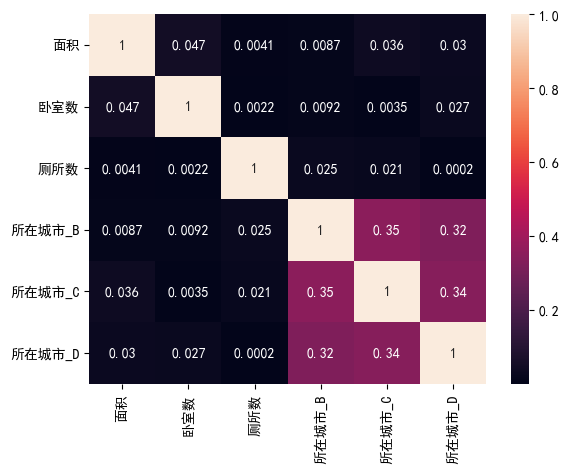

In [81]:
# 对X里所有变量之间的相关系数的绝对值绘制热力图
sns.heatmap(rele, annot=True)

In [82]:
# 在自变量里添加一个常量（为了引入截距）
X = sm.add_constant(X)

In [83]:
# 构建线性回归模型，并进行数据拟合
model = sm.OLS(Y,X)
# Ordinary Least Squares 最小二成法

# 输出拟合结果
result = sm.OLS(Y,X).fit()
result.summary()

# coefficient n.系数

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     价格   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.766e+04
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:16:33   Log-Likelihood:                -10262.
No. Observations:                1000   AIC:                         2.054e+04
Df Residuals:                     993   BIC:                         2.057e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.824e+04   1383.024     49.341      0.000    6.55e+04     7.1e+04
面积           299.7279      0.440    680.850      0.000     298.864     300.592
卧室数         8365.4726    270.523     30.923      0.000    7834.610    8896.335
厕所数         1.131e+04    394.998     28.640      0.000    1.05e+04    1.21e+04
所在城市_B      4250.1208    625.407      6.796      0.000    3022.850    5477.391
所在城市_C      9213.1877    615.594     14.966      0.000    8005.173    1.04e+04
所在城市_D      1.506e+04    633.226     23.779      0.000    1.38e+04    1.63e+04
==============================================================================
Omnibus:                        4.096   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.538
Skew:                          -0.066   Prob(JB):                        0.170
Kurtosis:                       2.740   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 预测新数据

In [84]:
# 读取用于预测的示例数据
new_observation = pd.read_csv("house_price_predict_simple.csv")
new_observation

,面积,卧室数,厕所数,所在城市
0,957.2,2,2,C
1,1998.7,2,2,C
2,1641.5,4,1,C
3,746.9,2,2,C
4,1210.7,2,1,B
5,2325.7,2,1,C
6,286.7,4,2,A
7,1285.5,4,1,D
8,2133.0,3,1,D
9,1066.6,3,1,D


In [85]:
# 把new_observation的“所在城市”列转换为包含'A'、'B'、'C'、'D'类别的分类变量
new_observation['所在城市'] = pd.Categorical(new_observation['所在城市'],categories=['A','B','C','D'])
new_observation

,面积,卧室数,厕所数,所在城市
0,957.2,2,2,C
1,1998.7,2,2,C
2,1641.5,4,1,C
3,746.9,2,2,C
4,1210.7,2,1,B
5,2325.7,2,1,C
6,286.7,4,2,A
7,1285.5,4,1,D
8,2133.0,3,1,D
9,1066.6,3,1,D


In [86]:
# 为new_observation的“所在城市”分类变量创建虚拟变量，并指定虚拟变量类型为整数，且删除掉第一个虚拟变量
new_observation = pd.get_dummies(new_observation, columns=['所在城市'], dtype=float, drop_first=True)


In [87]:
# 在new_observation里添加一个常量（为了引入截距）
new_observation = sm.add_constant(new_observation)
new_observation

,const,面积,卧室数,厕所数,所在城市_B,所在城市_C,所在城市_D
0,1.0,957.2,2,2,0.0,1.0,0.0
1,1.0,1998.7,2,2,0.0,1.0,0.0
2,1.0,1641.5,4,1,0.0,1.0,0.0
3,1.0,746.9,2,2,0.0,1.0,0.0
4,1.0,1210.7,2,1,1.0,0.0,0.0
5,1.0,2325.7,2,1,0.0,1.0,0.0
6,1.0,286.7,4,2,0.0,0.0,0.0
7,1.0,1285.5,4,1,0.0,0.0,1.0
8,1.0,2133.0,3,1,0.0,0.0,1.0
9,1.0,1066.6,3,1,0.0,0.0,1.0


In [88]:
# 利用前面的线性回归模型，把new_observation作为自变量进行预测
predicted_value = result.predict(new_observation)
predicted_value

0    403709.343688
1    715875.928746
2    614231.460486
3    340676.570920
4    463414.678539
5    802574.329486
6    210259.558968
7    513372.336330
8    759026.240430
9    439396.431206
dtype: float64